# Spectra of object SDSS J080218.65+304622.8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from IPython import display
from astroML.datasets import fetch_sdss_spectrum

In [2]:
# do *not* show python warnings :
warnings.filterwarnings('ignore')
# interactive plot : 
# %matplotlib widget

## 1. 查詢資料

main paper path : https://ui.adsabs.harvard.edu/abs/2009ApJ...705L..76W/abstract

論文網站的右邊有個欄位叫做 "DATA PRODUCTS"，點擊欄位裡的 "SIMBAD"。  
SIMBAD(Set of Identifications, Measurements, and Bibliography for Astronomical Data) :  
SIMBAD Database at the CDS (Centre de données astronomiques de Strasbourg) (史特拉斯堡天文資料中心)
path : http://simbad.u-strasbg.fr/simbad/sim-ref?querymethod=bib&simbo=on&submit=submit+bibcode&bibcode=2009ApJ...705L..76W

畫面如下 ：

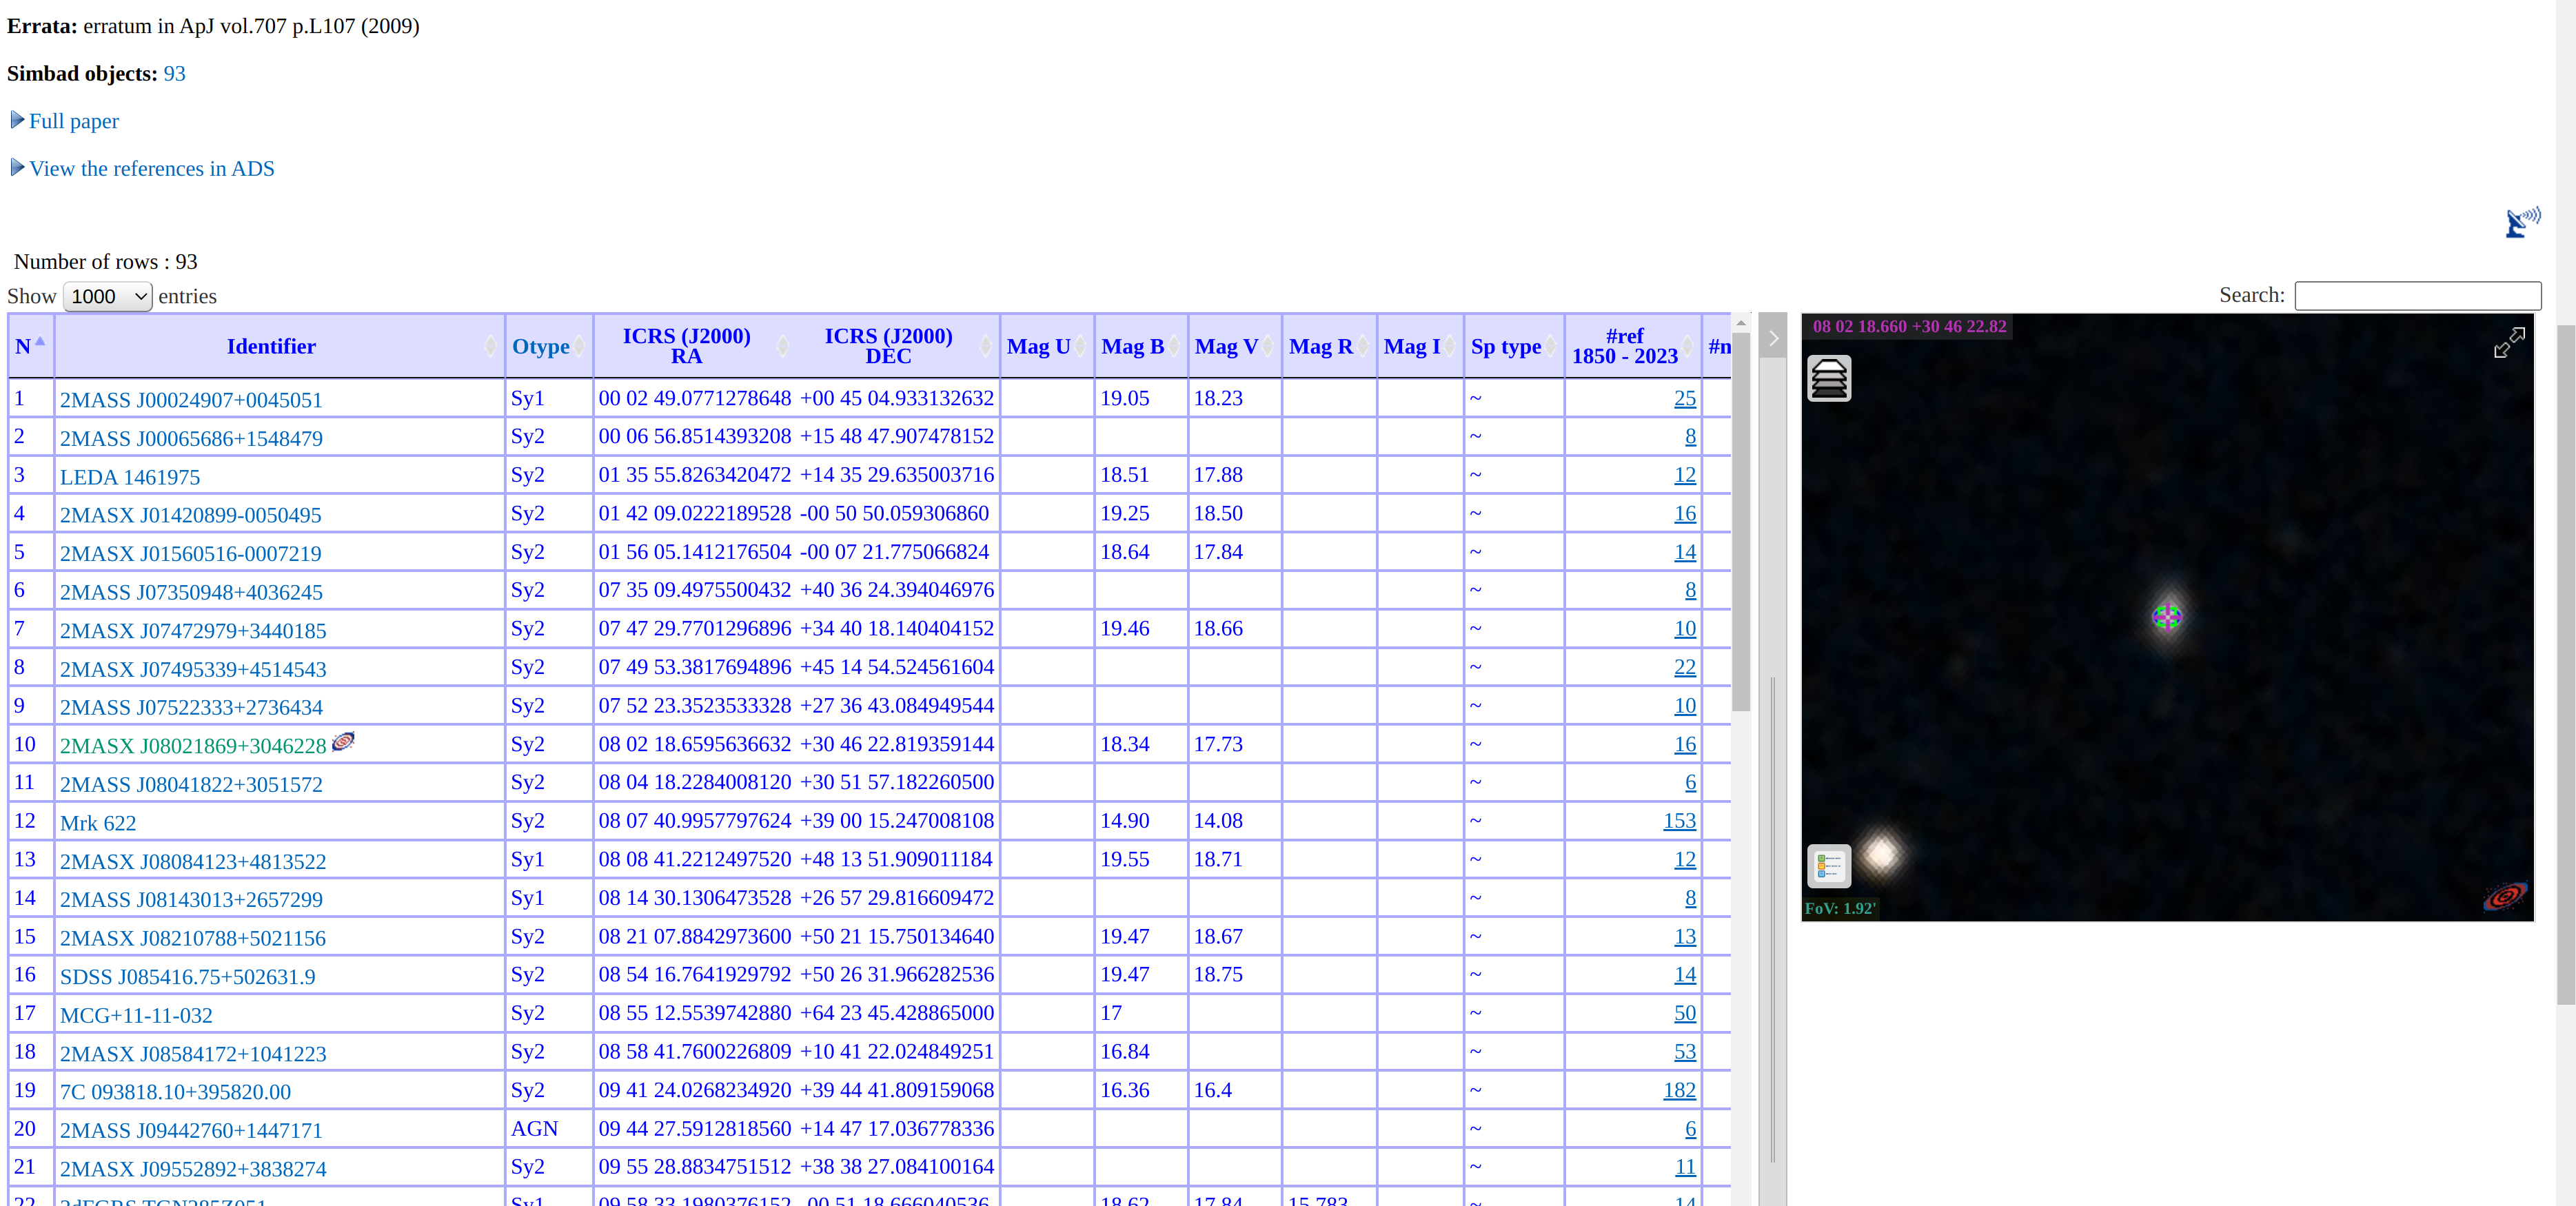

In [3]:
display.Image("spec_demo1.png")

上面畫面中的第10列即是我們要找的活躍星系，並且找到他們的赤道座標系的座標 (RA, DEC)。  
Note : 赤道座標系使用「赤緯 (Declination, Dec)」和「赤經 (Right Ascension, RA)」  
參考 ： https://astronomy.swin.edu.au/cosmos/e/equatorial+coordinate+system

接下來打開 Sloan Digital Sky Survey 的 Explore Tool 網站  
path : http://skyserver.sdss.org/dr7/en/tools/explore/obj.asp  
畫面如下：

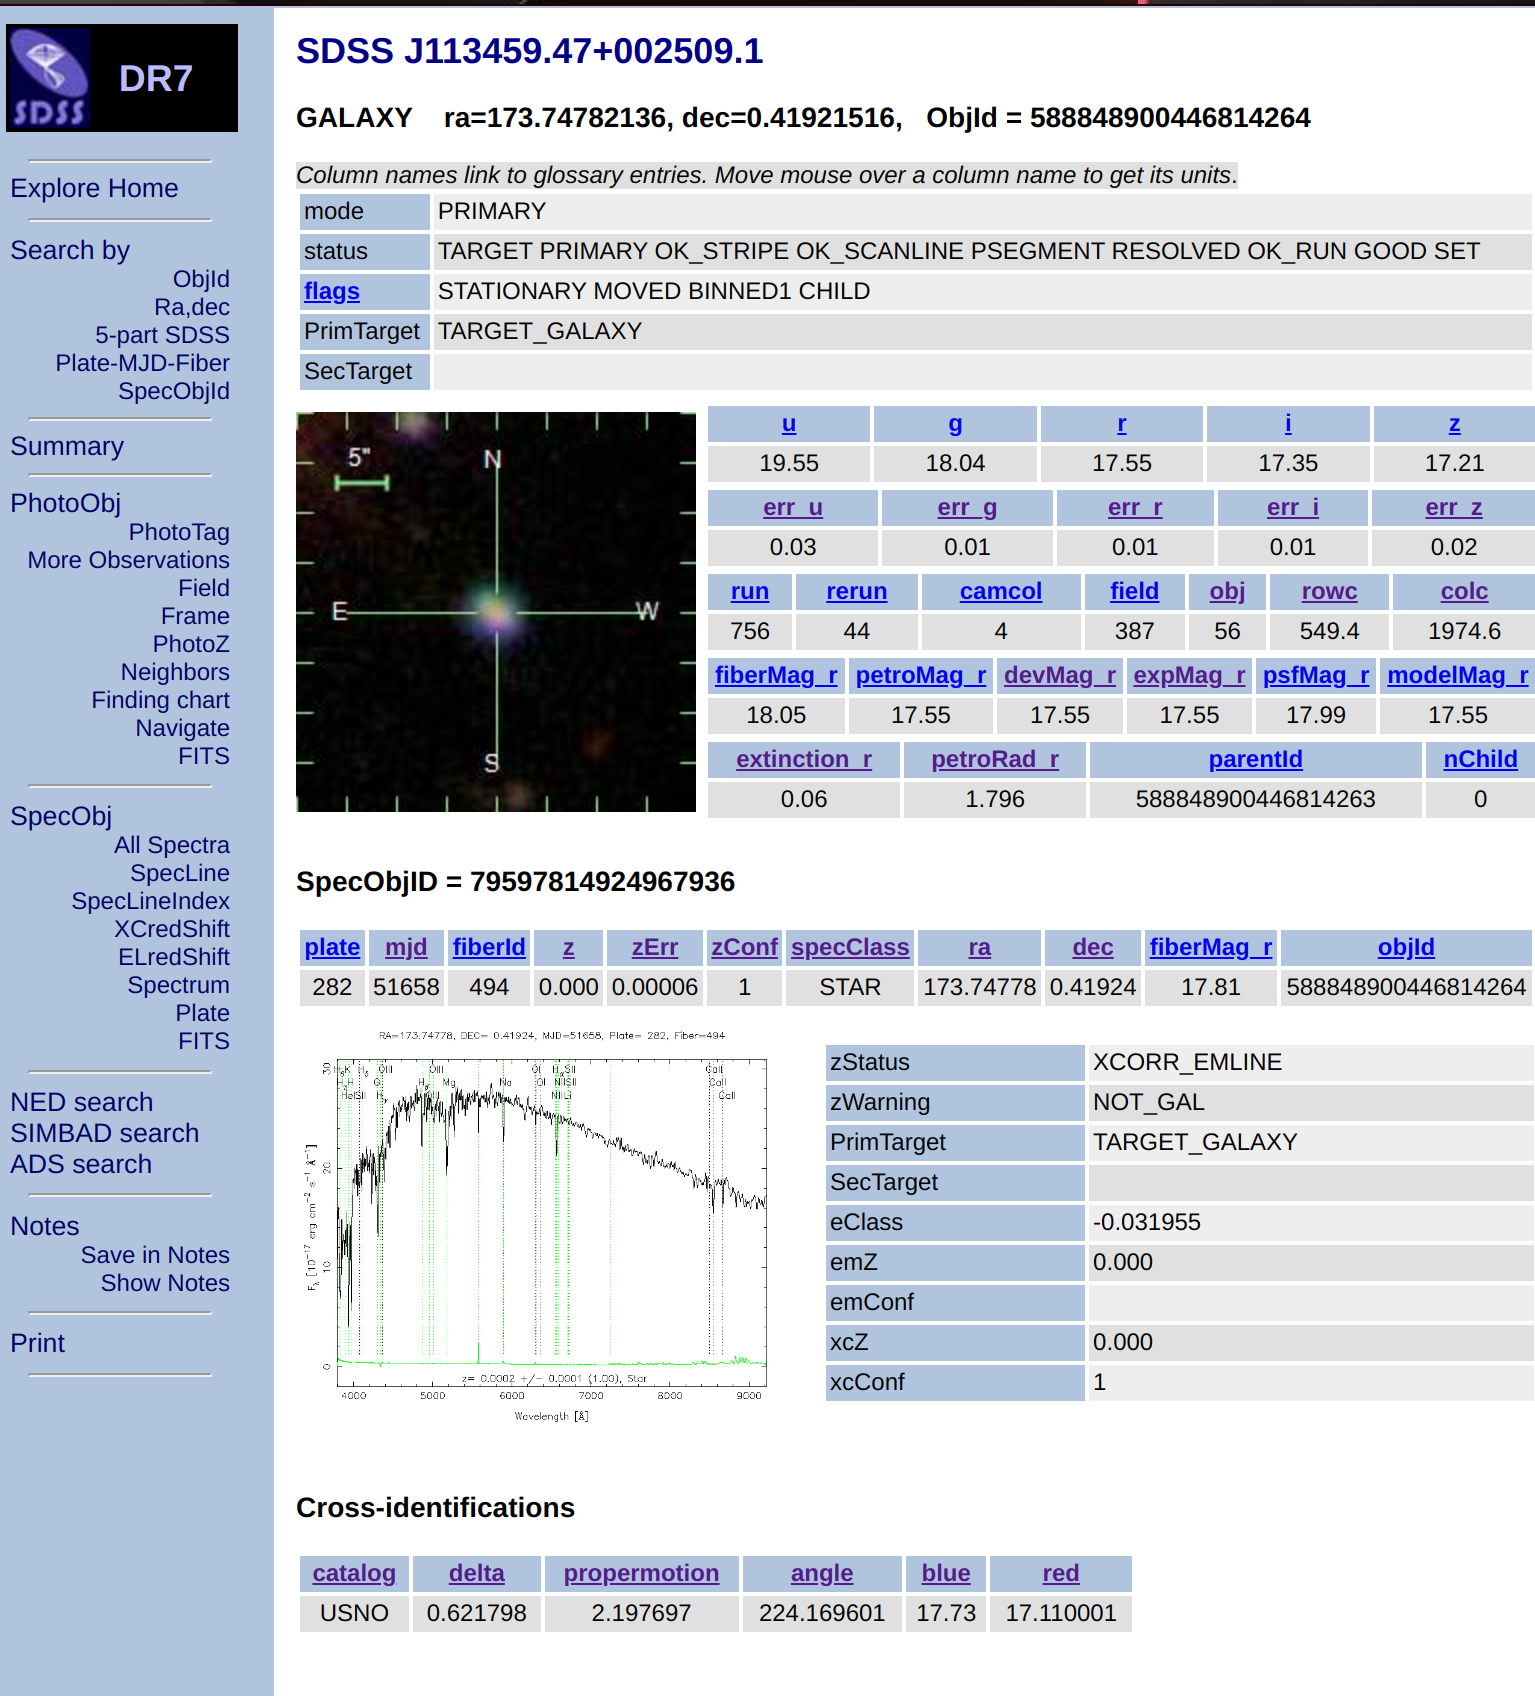

In [4]:
display.Image("spec_demo2.png")

點擊右邊欄位的 "Search by Ra, dec"，輸入剛剛所查到的 (RA, DEC)。

就可以查到 ： 

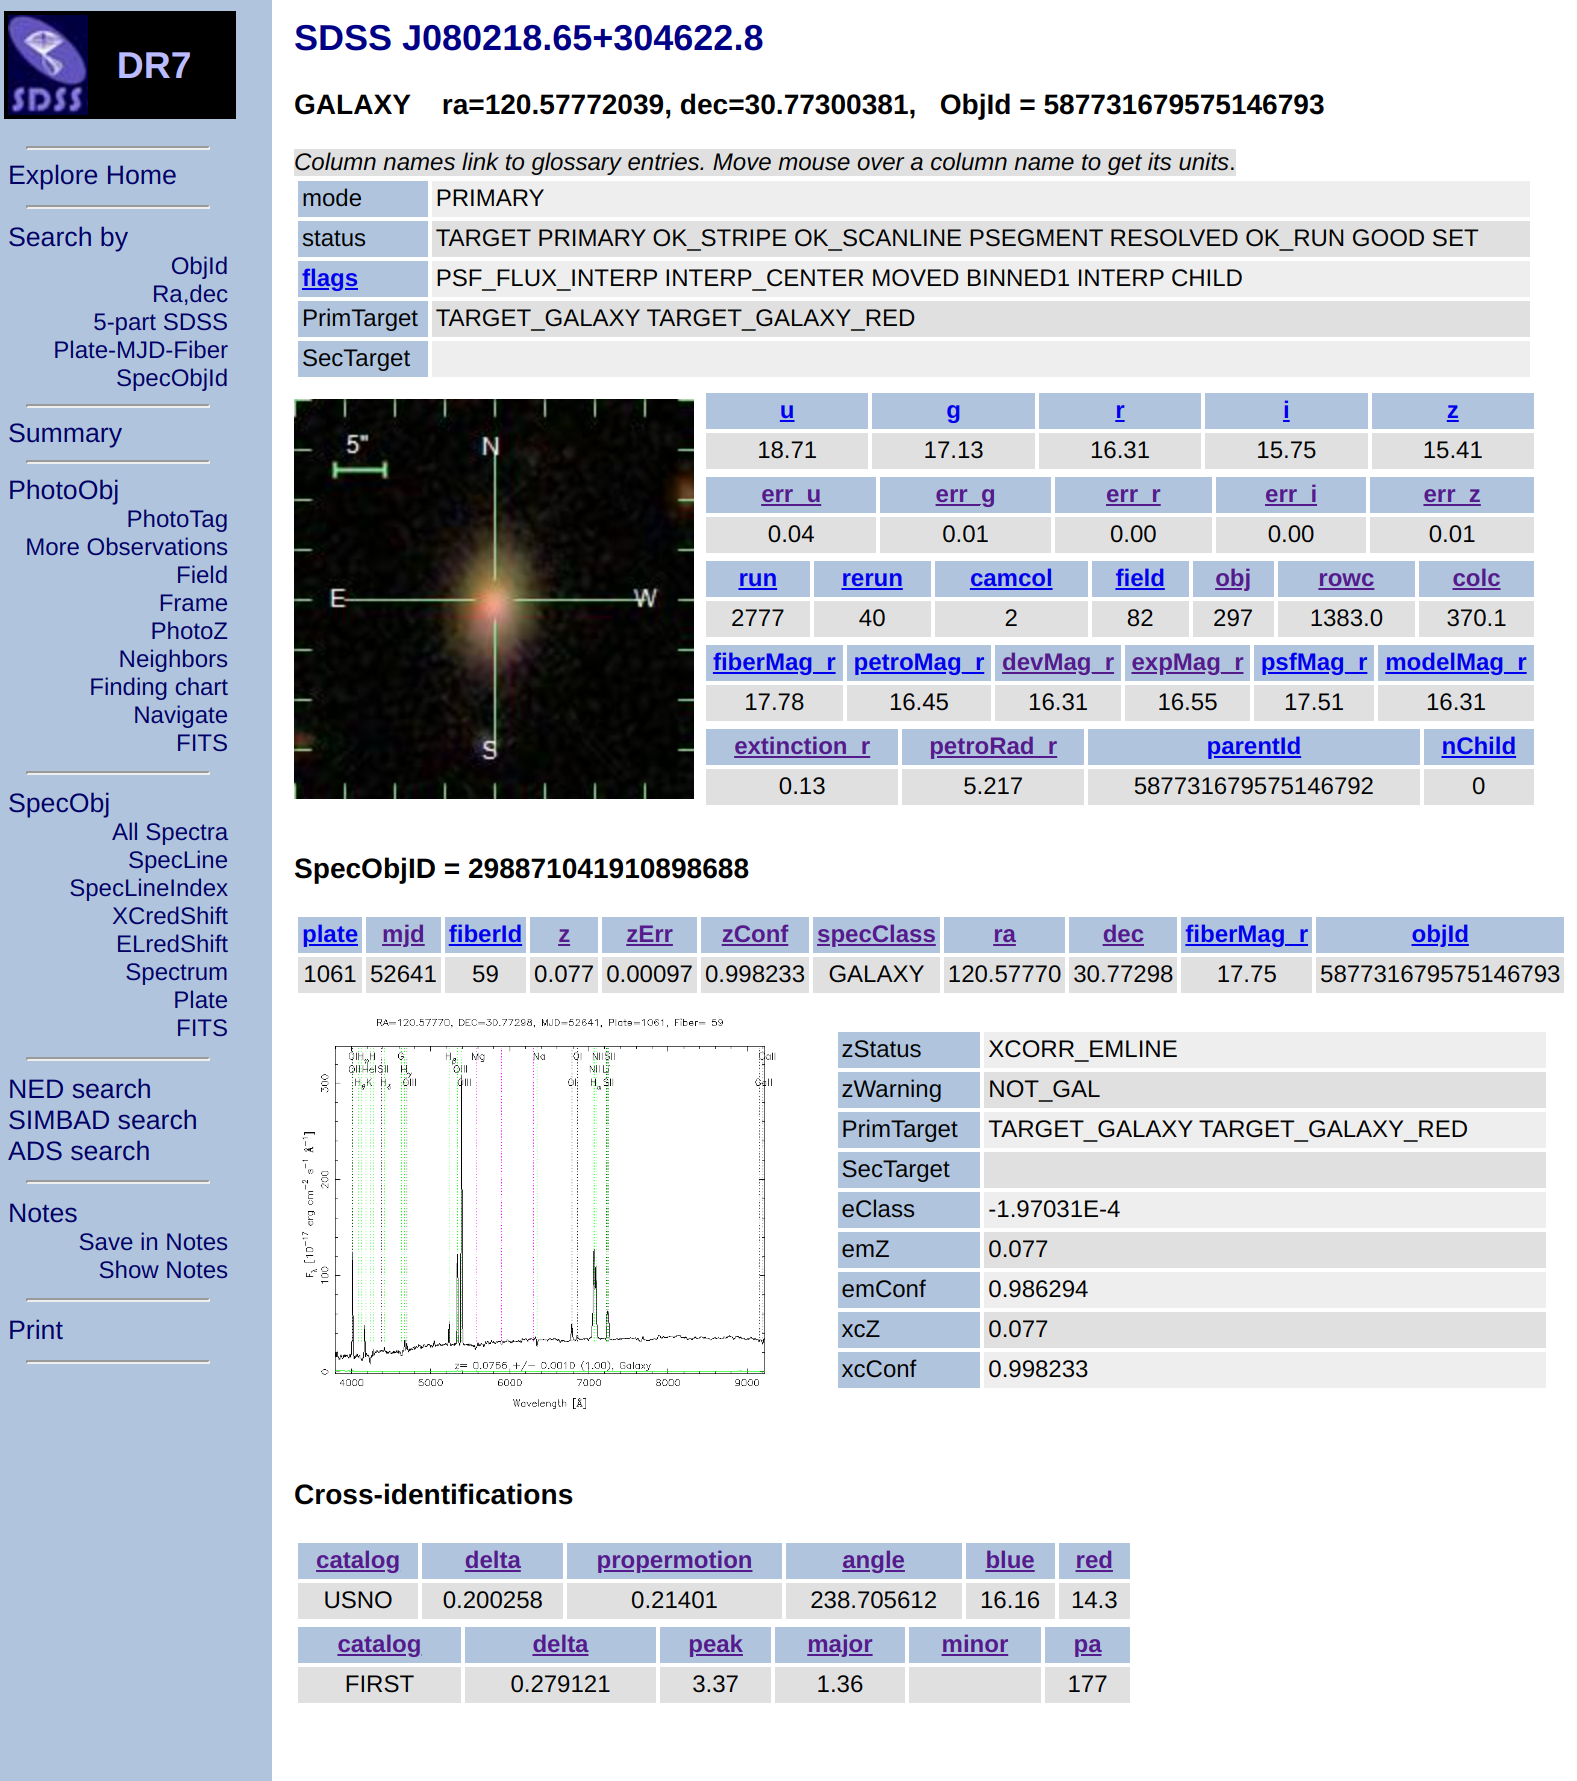

In [5]:
display.Image("spec_demo3.png")

記住裡面的 "plate"、"mjd"、"fiberId" 等資訊。

## 2. 畫出光譜

In [6]:
plate = 1061
fiber = 59  # fiberID
mjd = 52641
z = 0.077  # redshift
spec = fetch_sdss_spectrum(plate=plate, fiber=fiber, mjd=mjd)

元素光譜參考 ： http://classic.sdss.org/dr7/algorithms/linestable.html

In [7]:
H_beta = 4862.68
O3_1 = 4960.295
O3_2 = 5008.240
N2_1 = 6549.86
H_alpha = 6564.61
N2_2 = 6585.27
S2_1 = 6718.29
S2_2 = 6732.67

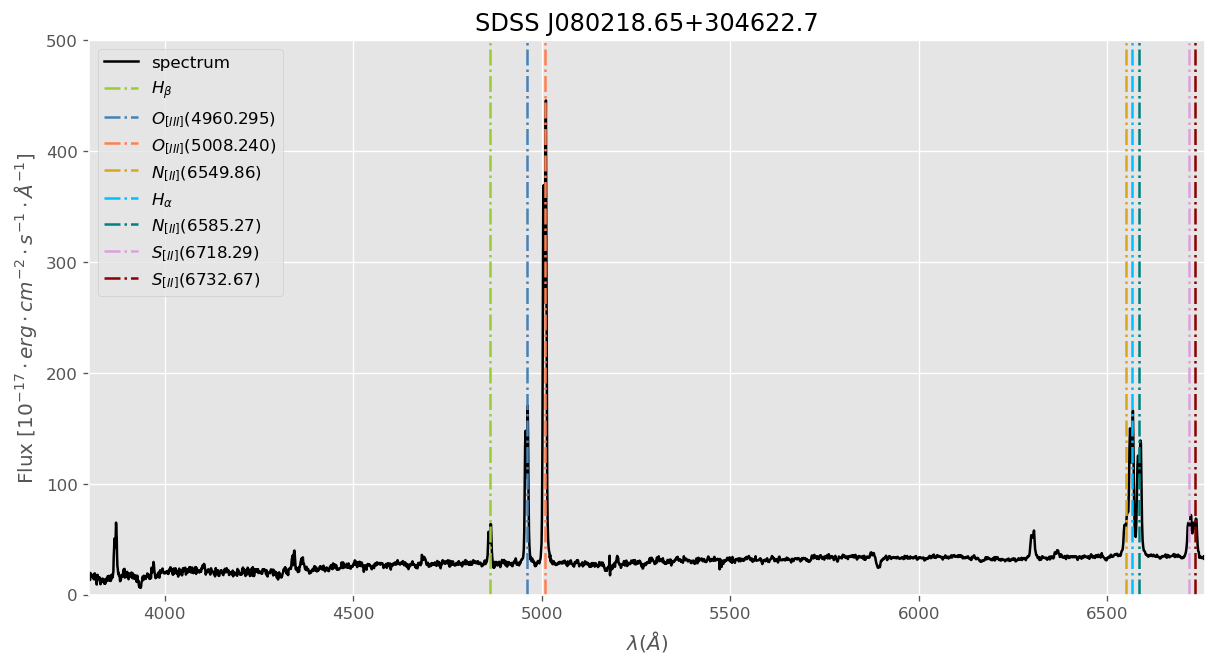

In [8]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
plt.style.use('ggplot')
plt.plot(spec.wavelength(restframe=True), spec.spectrum, '-', color='black', label='spectrum')

plt.axvline(x=H_beta, color='yellowgreen', linestyle="-.", label=r'$H_{\beta}$')
plt.axvline(x=O3_1, color='steelblue', linestyle="-.", label=r'$O_{[III]}$(4960.295)')
plt.axvline(x=O3_2, color='coral', linestyle="-.", label=r'$O_{[III]}$(5008.240)')
plt.axvline(x=N2_1, color='goldenrod', linestyle="-.", label=r'$N_{[II]}$(6549.86)')
plt.axvline(x=H_alpha, color='deepskyblue', linestyle="-.", label=r'$H_{\alpha}$')
plt.axvline(x=N2_2, color='teal', linestyle="-.", label=r'$N_{[II]}$(6585.27)')
plt.axvline(x=S2_1, color='plum', linestyle="-.", label=r'$S_{[II]}$(6718.29)')
plt.axvline(x=S2_2, color='darkred', linestyle="-.", label=r'$S_{[II]}$(6732.67)')

plt.xlabel(r'$\lambda (\AA)$')
plt.ylabel(r'Flux $[10^{-17}\cdot erg\cdot cm^{-2}\cdot s^{-1}\cdot\AA^{-1}]$')
plt.title("SDSS J080218.65+304622.7")
plt.axis([3800, 6760, 0, 500])
plt.legend()
plt.show()

另一參考資源 ： http://skyserver.sdss.org/dr17